In [78]:
import numpy as np

In [261]:
input_size=3 #no of features
layers=[3,4]  # no of neurons in 1st and 2nd  layers  
output_size=2  #

In [285]:
def softmax(a):
    e_pa=np.exp(a)
    # keep dim does not change the dimension of vector while sum 
    ans = e_pa / np.sum(e_pa,axis=1,keepdims=True)
    
    return ans 


In [286]:
class neuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        
        np.random.seed(0)
        
        model={}
        #3 layer model
        
        #1 layer 
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        
         #1 layer 
        model['W2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        
         #1 layer 
        model['W3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        
        
        self.model=model
    
    
    def forward(self,x):
        
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) #activation function to convert in range (-1,1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs=(a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        a1,a2,y_=self.activation_outputs
        
        m=x.shape[0]
        
        delta3 = y_ - y
        dw3 = np.dot ( a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot ( a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot ( x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #update model parameters using gradiet decent 
        self.model['W1']-=learning_rate*dw1
        self.model['b1']-=learning_rate*db1
        
        self.model['W2']-=learning_rate*dw2
        self.model['b2']-=learning_rate*db2
        
        self.model['W3']-=learning_rate*dw3
        self.model['b3']-=learning_rate*db3
        
        
    def predict(self,x):
        
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
            
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        
        A1,A2,y_=self.activation_outputs
        
        print("W1",W1.shape)
        print("A1",A1.shape)
        
        print("W2",W2.shape)
        print("A2",A2.shape)
        
        print("W3",W3.shape)
        print("Y_",y_.shape)
        
        return
        
def loss(y_oht,p):
        l=- np.mean(y_oht*np.log(p))
        return l
       
def one_hot(y,depth):
        m=y.shape[0]
        
        y_oht=np.zeros((m,depth))
        
        y_oht[np.arange(m),y]=1
        
        return y_oht
    
  

In [287]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt



In [288]:
X,Y =make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=.2)

In [289]:
X.shape

(500, 2)

In [290]:
Y.shape

(500,)

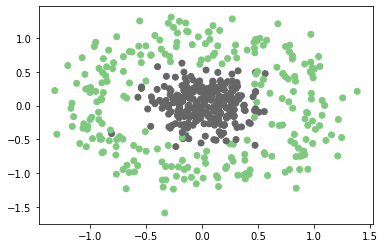

In [291]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [292]:
X[0]

array([0.22901038, 0.35623103])

In [293]:
model=neuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [294]:
model.forward(X)

array([[0.52335135, 0.47664865],
       [0.53144257, 0.46855743],
       [0.57726974, 0.42273026],
       [0.28383524, 0.71616476],
       [0.63877346, 0.36122654],
       [0.50841174, 0.49158826],
       [0.37442957, 0.62557043],
       [0.55888858, 0.44111142],
       [0.5711453 , 0.4288547 ],
       [0.3442594 , 0.6557406 ],
       [0.49498476, 0.50501524],
       [0.4336066 , 0.5663934 ],
       [0.36449759, 0.63550241],
       [0.37609645, 0.62390355],
       [0.51318589, 0.48681411],
       [0.40138333, 0.59861667],
       [0.4729603 , 0.5270397 ],
       [0.6071061 , 0.3928939 ],
       [0.45184873, 0.54815127],
       [0.43976498, 0.56023502],
       [0.48953223, 0.51046777],
       [0.55503744, 0.44496256],
       [0.58933294, 0.41066706],
       [0.64427947, 0.35572053],
       [0.45240396, 0.54759604],
       [0.56502192, 0.43497808],
       [0.5600346 , 0.4399654 ],
       [0.47502227, 0.52497773],
       [0.41733084, 0.58266916],
       [0.70560946, 0.29439054],
       [0.

In [295]:
print(model.summary())

W1 (2, 10)
A1 (500, 10)
W2 (10, 5)
A2 (500, 5)
W3 (5, 2)
Y_ (500, 2)
None


In [296]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    
    traning_loss=[]
    
    classes=2
    Y_OHT=one_hot(Y,classes)
    
    for xi in range(epochs):
        
        Y_=model.forward(X)
        l = loss(Y_OHT,Y_)
        traning_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("epoch %d loss %.4f"%(xi,l))
        
    return traning_loss
    

In [297]:
losses=train(X,Y,model,500,0.001)

epoch 0 loss 0.3571
epoch 1 loss 0.3554
epoch 2 loss 0.2593
epoch 3 loss 0.2407
epoch 4 loss 0.2258
epoch 5 loss 0.2132
epoch 6 loss 0.2020
epoch 7 loss 0.1919
epoch 8 loss 0.1827
epoch 9 loss 0.1742
epoch 10 loss 0.1664
epoch 11 loss 0.1593
epoch 12 loss 0.1527
epoch 13 loss 0.1467
epoch 14 loss 0.1411
epoch 15 loss 0.1360
epoch 16 loss 0.1313
epoch 17 loss 0.1270
epoch 18 loss 0.1230
epoch 19 loss 0.1193
epoch 20 loss 0.1159
epoch 21 loss 0.1127
epoch 22 loss 0.1098
epoch 23 loss 0.1070
epoch 24 loss 0.1045
epoch 25 loss 0.1021
epoch 26 loss 0.0999
epoch 27 loss 0.0978
epoch 28 loss 0.0958
epoch 29 loss 0.0940
epoch 30 loss 0.0922
epoch 31 loss 0.0906
epoch 32 loss 0.0891
epoch 33 loss 0.0876
epoch 34 loss 0.0862
epoch 35 loss 0.0849
epoch 36 loss 0.0837
epoch 37 loss 0.0825
epoch 38 loss 0.0814
epoch 39 loss 0.0803
epoch 40 loss 0.0793
epoch 41 loss 0.0783
epoch 42 loss 0.0774
epoch 43 loss 0.0765
epoch 44 loss 0.0756
epoch 45 loss 0.0748
epoch 46 loss 0.0740
epoch 47 loss 0.0732
ep

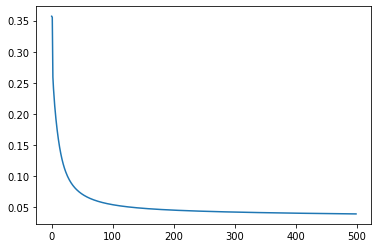

In [298]:
plt.plot(losses)

In [301]:
from visualize import plot_decision_boundary

ModuleNotFoundError: No module named 'visualize'

In [302]:
plot_decision_boundary(lambda x: model.predict(x),X,Y)


In [ ]:
outputs=model.predict(X)


In [ ]:
traning_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("traning_accuracy is %.4f"%(traning_accuracy*100))

In [307]:
#xor data


In [308]:
XX=np.array([[0,0],[0,1],[1,0],[1,1]])
YY=np.array([0,1,1,0])

In [309]:
losses2= train(XX,YY,model,200,0.1)

epoch 0 loss 2.6112
epoch 1 loss 1.3278
epoch 2 loss 0.9747
epoch 3 loss 0.8254
epoch 4 loss 0.1254
epoch 5 loss 0.0743
epoch 6 loss 0.0619
epoch 7 loss 0.0543
epoch 8 loss 0.0487
epoch 9 loss 0.0442
epoch 10 loss 0.0406
epoch 11 loss 0.0375
epoch 12 loss 0.0349
epoch 13 loss 0.0327
epoch 14 loss 0.0306
epoch 15 loss 0.0288
epoch 16 loss 0.0272
epoch 17 loss 0.0257
epoch 18 loss 0.0244
epoch 19 loss 0.0231
epoch 20 loss 0.0219
epoch 21 loss 0.0208
epoch 22 loss 0.0198
epoch 23 loss 0.0189
epoch 24 loss 0.0181
epoch 25 loss 0.0173
epoch 26 loss 0.0165
epoch 27 loss 0.0159
epoch 28 loss 0.0153
epoch 29 loss 0.0147
epoch 30 loss 0.0142
epoch 31 loss 0.0137
epoch 32 loss 0.0132
epoch 33 loss 0.0128
epoch 34 loss 0.0124
epoch 35 loss 0.0121
epoch 36 loss 0.0117
epoch 37 loss 0.0114
epoch 38 loss 0.0111
epoch 39 loss 0.0108
epoch 40 loss 0.0105
epoch 41 loss 0.0103
epoch 42 loss 0.0100
epoch 43 loss 0.0098
epoch 44 loss 0.0096
epoch 45 loss 0.0094
epoch 46 loss 0.0092
epoch 47 loss 0.0090
ep

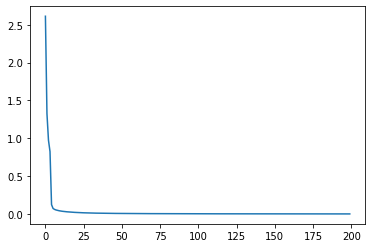

In [310]:
plt.plot(losses2)

In [313]:
model.predict(XX)

array([0, 1, 1, 0], dtype=int64)